In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
from functools import partial
from tqdm import tqdm

import bases
import eigensolvers
import functionals
import generators
import otrhogonalizations
import representations
import reconstructions
import utils

In [2]:
def get_settings(ndim=1, num_col=1500, degree=10):
    if ndim == 2:
        initial_state = (0, 0)
        Yr, Xr = utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)
        utils.plot_torus(Yr)
    else:
        initial_state=0
        Yr, Xr = utils.generate_krylov(generators.angle_evolution, generators.unit_circle_observable_function, initial_state, num_col)
        utils.plot_complex_on_unit_circle(Yr)
    basis = partial(bases.fourier_basis, degree=degree, combinations=True)
    return Xr, basis

def test_eigenvalue_power(Ur, representation_func, basis):
    n_dim = Ur.shape[1]
    K, V, L = representation_func(Ur, basis=basis)
    angles = [np.angle(e) for e in L]
    M = L.shape[0]
    pure_diff = np.empty((M, M))
    mod_diff = np.empty((M, M))
    for i in range(M):
        for j in range(M):
            p = angles[i]/angles[j] if abs(angles[j]) > 1e-9 else angles[i]
            pure_diff[i,j] = abs(L[i] - L[j]**p)
            p_mod = p % (2*np.pi)
            mod_diff[i,j] = abs(L[i] - L[j]**p_mod)
    pure_diff_df = pd.DataFrame(pure_diff, index=angles, columns=angles)
    mod_diff_df = pd.DataFrame(mod_diff, index=angles, columns=angles)
    return pure_diff_df, mod_diff_df

def show_heatmap(df):
    fig, ax = plt.subplots(figsize=(16,12))
    ax.set_title("Eigenvalue reconstruction difference")
    sns.heatmap(df, vmin=0, vmax=1, linewidth=0.5, ax=ax, annot=True, fmt='.2f')
    plt.show()


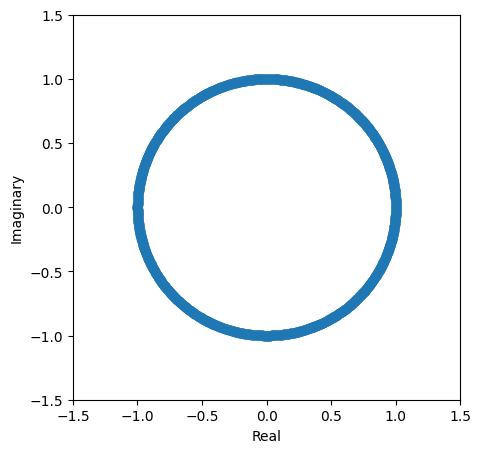

In [3]:
Xr, basis = get_settings()
pure_diff_df, mod_diff_df = test_eigenvalue_power(Xr, representations.mpEDMD_matrix_representation, basis)

# p = angle[i]/angle[j]

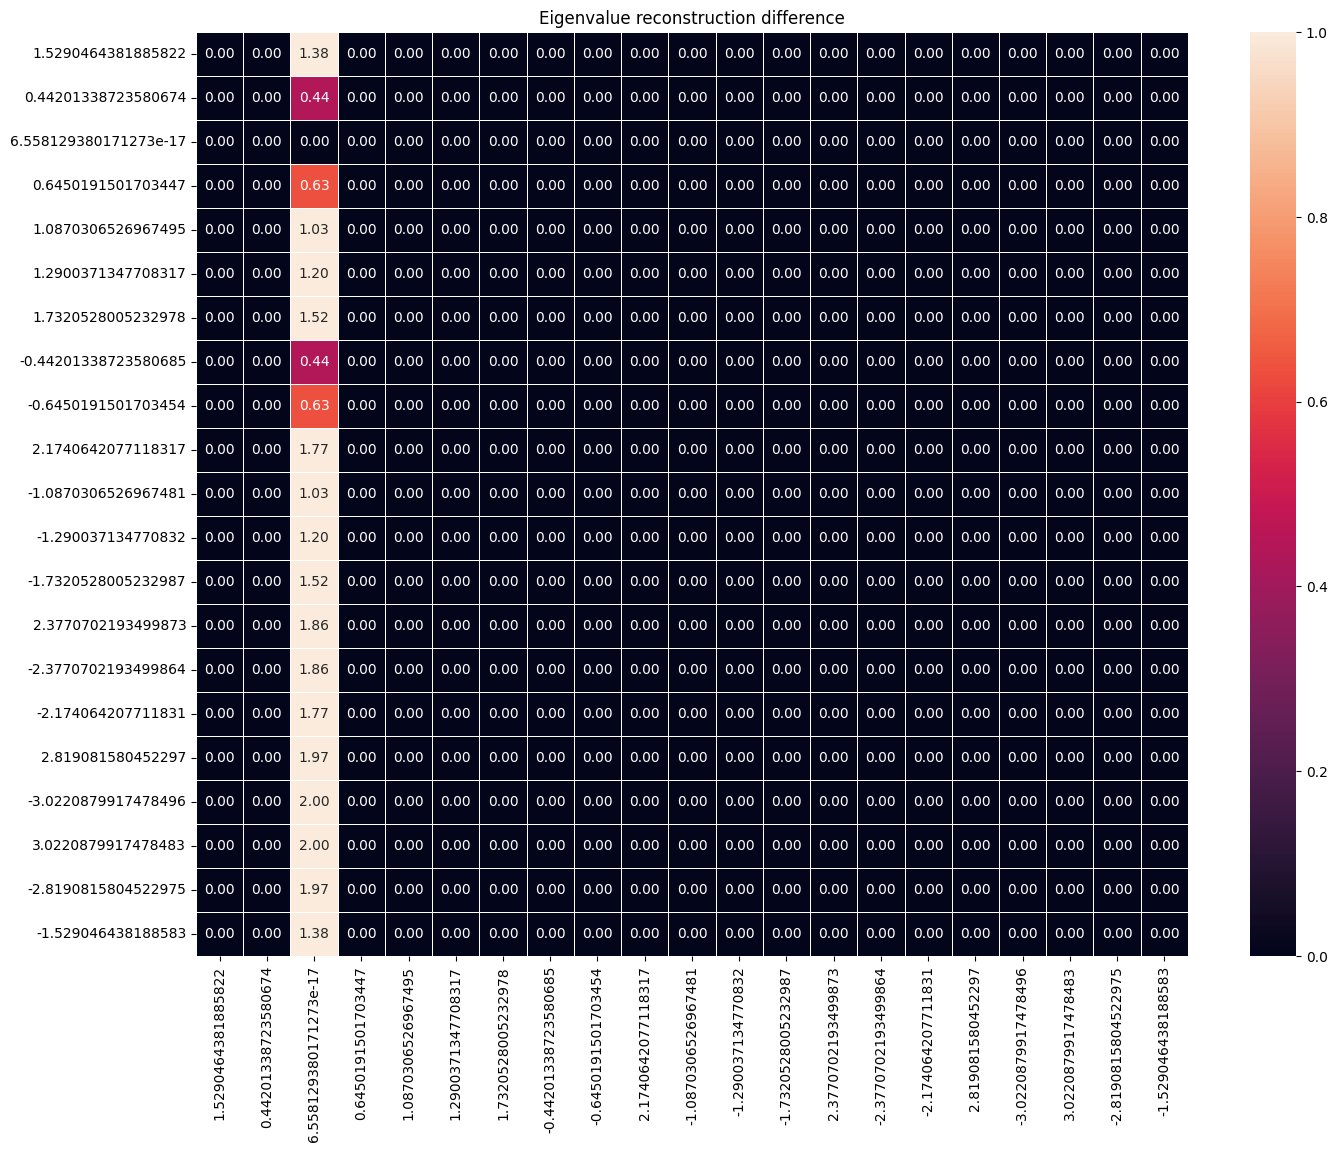

In [4]:
show_heatmap(pure_diff_df)

# p = angle[i]/angle[j] (mod 2$\pi$)

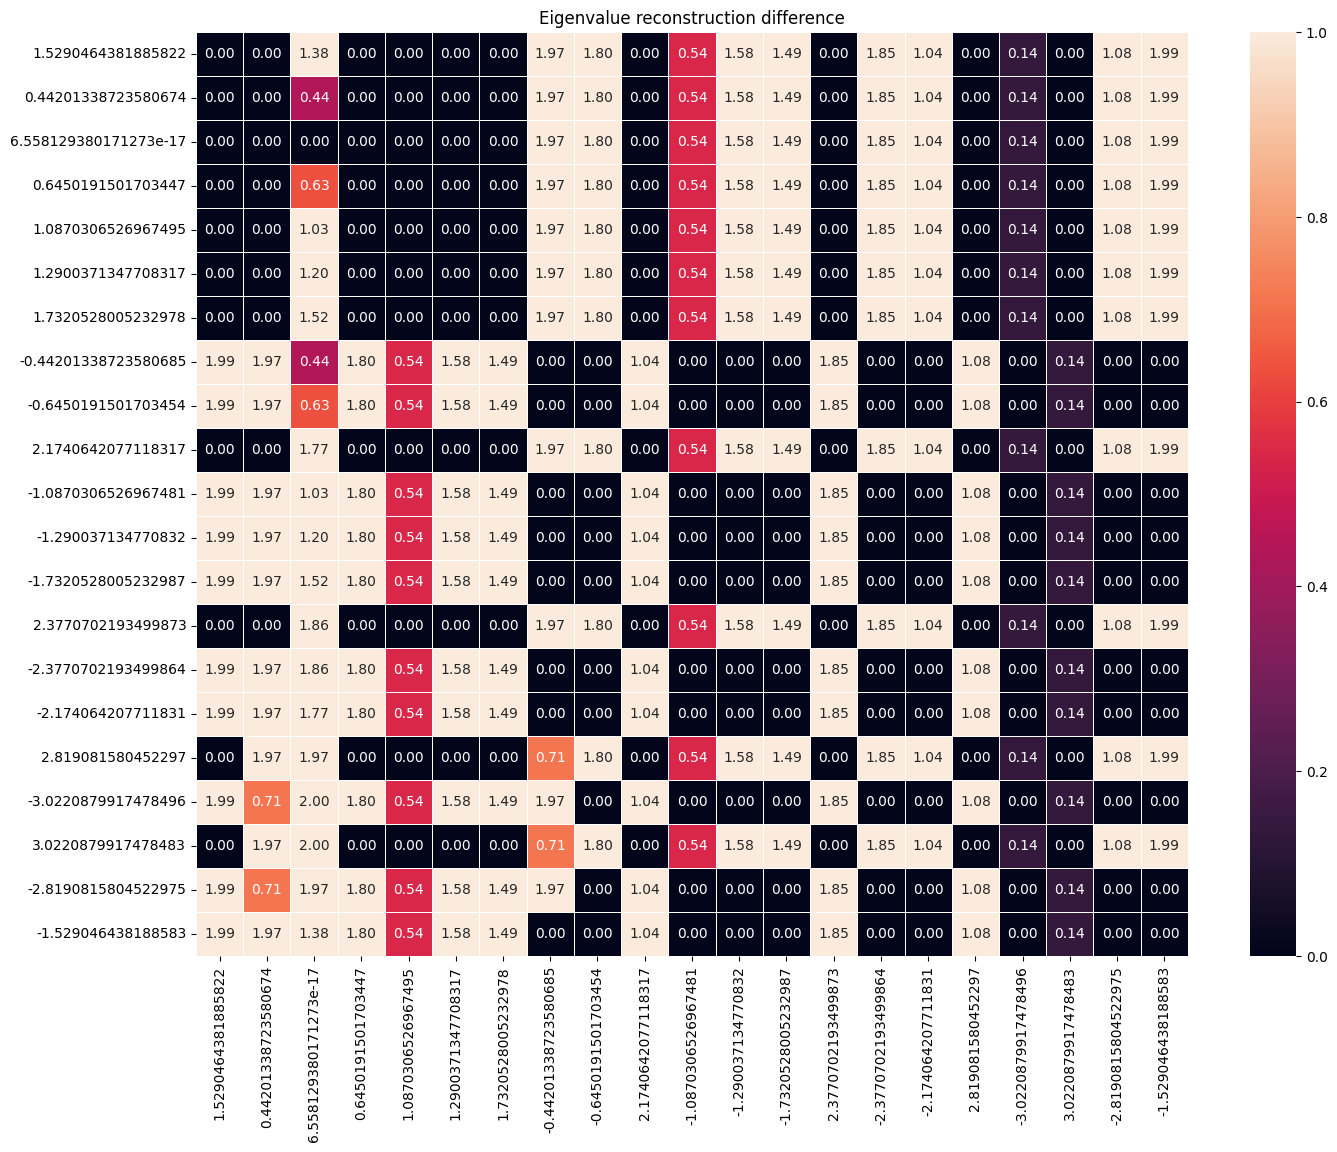

In [5]:
show_heatmap(mod_diff_df)